In [1]:
import pandas as pd

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df_imoveis = pd.DataFrame(data.data, columns=data.feature_names)
df_imoveis['Preco'] = data.target * 100000 

import os

# Definir caminho COMPLETO
caminho_completo = r'C:\Users\Fernanda\Documents\04. Cursos\17.Python\04.python_deepseek_learning'

# Criar pasta se não existir
os.makedirs(caminho_completo, exist_ok=True)  # <--- LINHA MÁGICA!

# Agora salve o CSV
df_imoveis.to_csv(os.path.join(caminho_completo, 'california_housing.csv'), index=False)
print(f"Arquivo salvo em: {caminho_completo}")

Arquivo salvo em: C:\Users\Fernanda\Documents\04. Cursos\17.Python\04.python_deepseek_learning


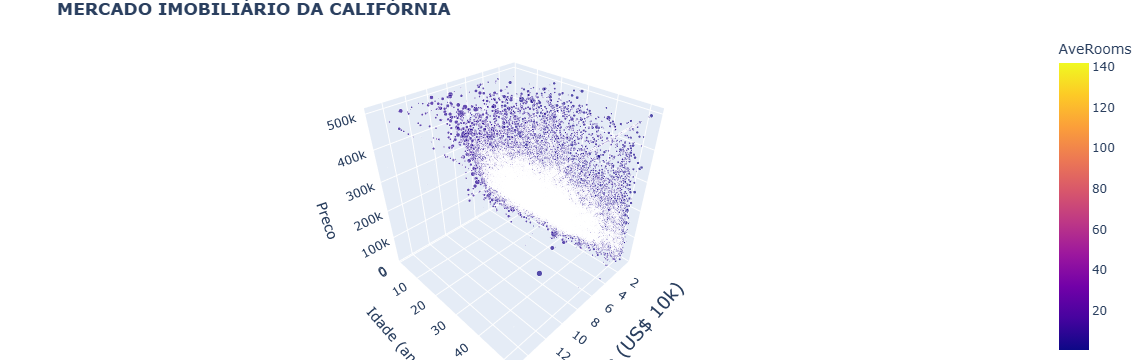

In [2]:
import plotly.express as px

fig = px.scatter_3d(df_imoveis, 
                    x='MedInc',          # Renda média do bairro
                    y='HouseAge',         # Idade média das casas
                    z='Preco',           # Preço do imóvel
                    color='AveRooms',     # Quartos por domicílio
                    size='Population',    # Tamanho por bolha = população
                    hover_name='AveBedrms', # Quartos por casa
                    title="<b>MERCADO IMOBILIÁRIO DA CALIFÓRNIA</b>",
                    labels={'MedInc': 'Renda (US$ 10k)', 'HouseAge': 'Idade (anos)'})

fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1)), 
                  scene=dict(xaxis_title_font=dict(size=18)),
                  margin=dict(l=0, r=0, b=0, t=30))
fig.show()

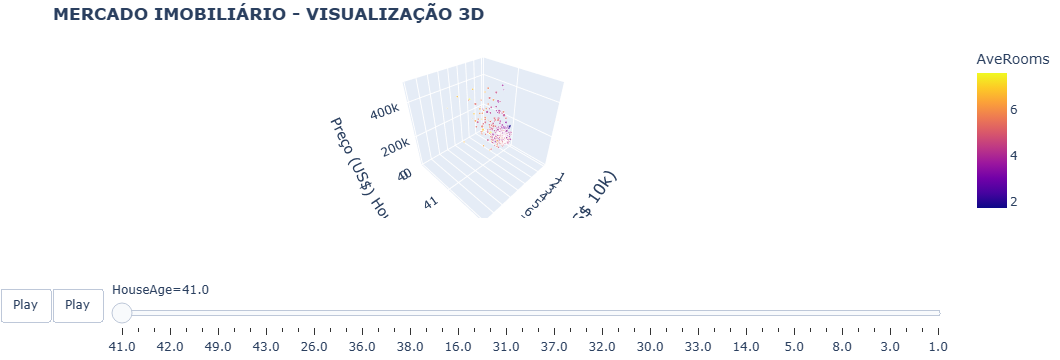

In [3]:
import plotly.express as px

try:
    df = pd.read_csv(os.path.join(caminho_completo, 'california_housing.csv'))
except:
    df = pd.read_csv(os.path.join(caminho_base, 'california_housing.csv'))

fig = px.scatter_3d(df,
                    x='MedInc',
                    y='HouseAge', 
                    z='Preco',
                    color='AveRooms',
                    size='Population',
                    hover_data=['AveBedrms', 'Population'],
                    animation_frame='HouseAge',  # Novo: animação por idade
                    range_z=[0, 500000],  # Limite do eixo Z
                    labels={'MedInc': 'Renda (US$ 10k)', 'Preco': 'Preço (US$)'},
                    title='<b>MERCADO IMOBILIÁRIO - VISUALIZAÇÃO 3D</b>')

fig.update_layout(
    scene=dict(
        xaxis_title_font=dict(size=16),
        zaxis=dict(nticks=5)),
    margin=dict(l=0, r=0, b=0, t=40),
    updatemenus=[dict(buttons=[dict(label='Play',
                                  method='animate',
                                  args=[None])])]
)

fig.show()

In [4]:
# 1. Verificar se o pandas está acessando o caminho certo
import os
print("Documentos:", os.listdir(r'C:\Users\Fernanda\Documents'))

# 2. Checar espaço em disco (para evitar problemas)
import shutil
total, used, free = shutil.disk_usage("/")
print(f"Espaço livre: {free // (2**30)} GB")

Documentos: ['00. Documentos Aldo', '01. Celular', '02. IRPF', '03. Jundiai', '04. Cursos', '05. Kwid', '06. Relatórios', '07. Relatorios SABESP', '08. Curriculos', '09. Empregadores', '10. Compra do Mes', '11. Teste Psicologia', '12. MKTDigital', '13. Material para Leitura', '14. Fatura Vivo', '15. Backup Pai', '16. Upwork', '17. Whats Andre', '18. Inventário Carlos Bernardi', '19. IRPF Bernardi', 'Aldo Orçamentos Eletrico.xlsx', 'anaconda_projects', 'Blocos de Anotações do OneNote', 'conda', 'Default.rdp', 'desktop.ini', 'ia para animações.xlsx', 'Meus Vídeos', 'Minhas fontes de dados', 'Minhas Imagens', 'Minhas Músicas', 'Modelos Personalizados do Office', 'Power BI Desktop']
Espaço livre: 693 GB


In [5]:
import os
import stat

# Definir caminhos
caminho_base = r'C:\Users\Fernanda\Documents\04. Cursos\17.Python'
pasta_problema = os.path.join(caminho_base, '04.python_deepseek_learning')

# Verificar existência
print(f"Pasta 17.Python existe? {os.path.exists(caminho_base)}")
print(f"Pasta 04... existe? {os.path.exists(pasta_problema)}")

# Checar permissões (últimos 3 dígitos = permissões para 'outros')
permissoes = oct(os.stat(caminho_base).st_mode)[-3:]
print(f"Permissões da pasta 17.Python: {permissoes}")

# Listar conteúdo
print("\nConteúdo de 17.Python:")
try:
    print(os.listdir(caminho_base))
except Exception as e:
    print(f"Erro ao listar: {e}")

Pasta 17.Python existe? True
Pasta 04... existe? True
Permissões da pasta 17.Python: 777

Conteúdo de 17.Python:
['.git', '.ipynb_checkpoints', '01.python_testes_DeepSeek', '02.python-formacao-basica-3083858', '03.python_para_ciencia_dados_basico', '04.python_deepseek_learning', '05.Portifolio']


## Criar pasta PORTFÓLIO no local correto (DENTRO de 17.Python)
### Garantir criação segura
### Exportar gráfico (formato HTML + PNG)

In [6]:
pasta_portfolio = os.path.join(caminho_base, '05.Portfolio')  # <-- Caminho CORRETO

os.makedirs(pasta_portfolio, exist_ok=True)

fig.write_html(os.path.join(pasta_portfolio, "3d_imoveis_california.html"))
fig.write_image(os.path.join(pasta_portfolio, "preview_3d.png"), width=1200, height=800)

print(f"✅ Arquivos salvos em: {pasta_portfolio}")

Retrying in 7.06 seconds due to HTTPConnectionPool(host='localhost', port=52038): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000286ACFED510>: Failed to establish a new connection: [WinError 10061] Nenhuma conexão pôde ser feita porque a máquina de destino as recusou ativamente'))...
Retrying in 9.09 seconds due to HTTPConnectionPool(host='localhost', port=52038): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000286ACFEEBF0>: Failed to establish a new connection: [WinError 10061] Nenhuma conexão pôde ser feita porque a máquina de destino as recusou ativamente'))...
Retrying in 6.27 seconds due to HTTPConnectionPool(host='localhost', port=52038): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000286ACFEF130>: Failed to establish a new connection: [WinError 10061] Nenhuma conexão pôde ser 